# Face Mask Prediction using U-Net
Task is to predict the mask around the face in a given image.

# Instructions
- Some part of the code is already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

## Dataset
Faces in images marked with bounding boxes. Have around 409 images with around 1000 faces manually tagged via bounding box.
- Data file name: images.npy

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [1]:
import tensorflow
tensorflow.__version__

# importing tensorflow

'2.3.0'

In [ ]:
import numpy as np
import random
random.seed(0)

import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive/')

# mounting the drive

Mounted at /content/drive/


### Load the "images.npy" file (2 marks)
- This file contains images with details of bounding boxes

In [ ]:
import numpy as np
project_path = '/content/drive/My Drive/Networks/'
data = np.load(project_path + 'images.npy',allow_pickle=True)

# image file loaded into variable 'data'

### Check one sample from the loaded "images.npy" file  (3 marks)
- Hint: print data[10][1] 

In [ ]:
len(data)
# there are 409 images

409

In [ ]:
data[10][0]

# 0 index contains the pixels information

array([[[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [5, 5, 5],
        [6, 6, 6],
        [6, 6, 6]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [5, 5, 5],
        [6, 6, 6],
        [6, 6, 6]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [5, 5, 5],
        [5, 5, 5],
        [5, 5, 5]]], dtype=uint8)

In [ ]:
data[10][1]
# the index 1 contains the mask labels information

[{'imageHeight': 337,
  'imageWidth': 600,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.48, 'y': 0.10385756676557864},
   {'x': 0.7716666666666666, 'y': 0.6795252225519288}]}]

### Set image dimensions   (2 marks)
- Initialize image height, image width with value: 224 

In [ ]:
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

In [ ]:
print(data.shape[0], IMAGE_HEIGHT, IMAGE_WIDTH)

409 224 224


### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X" array
- Masks will be stored in "masks" array

In [ ]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))

for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X[index] = preprocess_input(np.array(img, dtype=np.float32))
    
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)

        masks[index][y1:y2, x1:x2] = 1 #to convert these pixels as 1


### Split the data into training and testing (3 marks)
- 400 images in training
- 9 images in testing data

Training data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, masks, test_size=0.022, random_state=10)


# Taking the test_size as 0.02 so the 409 images will be split into 400 and 9 for train and test respectively

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Shape of the train and test data

(400, 224, 224, 3)
(400, 224, 224)
(9, 224, 224, 3)
(9, 224, 224)


### Print a sample training image, image array and its mask (3 marks)


Print the image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


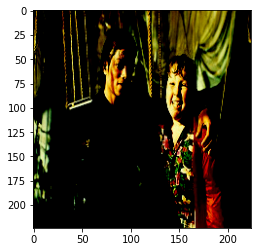

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[3])

# sample training image

In [ ]:
print(X_train[3])

# below is the sample training image array of the scaled image

[[[-0.10588235 -0.12156862 -0.40392154]
  [-0.49019605 -0.48235291 -0.75686276]
  [-0.2235294  -0.34117645 -0.74117649]
  ...
  [-0.18431371 -0.23921567 -0.54509807]
  [-0.87450981 -0.88235295 -1.        ]
  [-0.90588236 -0.93725491 -0.94509804]]

 [[-0.10588235 -0.12156862 -0.41960782]
  [-0.49019605 -0.48235291 -0.74117649]
  [-0.2235294  -0.34117645 -0.73333335]
  ...
  [-0.16862744 -0.21568626 -0.52941179]
  [-0.84313726 -0.8509804  -1.        ]
  [-0.89803922 -0.92941177 -0.93725491]]

 [[-0.11372548 -0.12156862 -0.4588235 ]
  [-0.52941179 -0.52941179 -0.7647059 ]
  [-0.17647058 -0.3098039  -0.67843139]
  ...
  [-0.10588235 -0.17647058 -0.49019605]
  [-0.79607844 -0.80392158 -0.96862745]
  [-0.89803922 -0.92156863 -0.93725491]]

 ...

 [[-0.93725491 -0.93725491 -0.93725491]
  [-0.92941177 -0.92941177 -0.92941177]
  [-0.92941177 -0.92941177 -0.92941177]
  ...
  [-0.95294118 -0.96862745 -0.96078432]
  [-0.94509804 -0.96078432 -0.95294118]
  [-0.94509804 -0.96078432 -0.95294118]]

 [

Print the mask

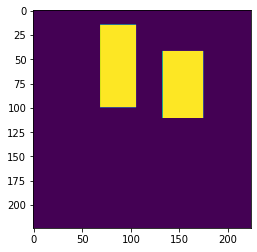

In [ ]:
plt.imshow(y_train[3])

# the image no. 3's mask

# Since MobileNet gives us output in the form of (28, 28) we need to resize the labels also in the same format.  
# I.e., the size of the output of the network and the labels must be the same

In [ ]:
scale_y = np.zeros((400, 28, 28))

for i in range(len(y_train)):

  scale = cv2.resize(y_train[i],(28,28))
  scale_y[i,:,:] = np.squeeze(scale)

scale_y.shape

(400, 28, 28)

In [ ]:
scale_y_t = np.zeros((9, 28, 28))

for i in range(len(y_test)):

  scale = cv2.resize(y_test[i],(28,28))
  scale_y_t[i,:,:] = np.squeeze(scale)

scale_y_t.shape

(9, 28, 28)

## Create the model (7 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Reshape, UpSampling2D, Concatenate, Conv2D
from tensorflow.keras.models import Model

def create_model(trainable=False):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=1.0, weights="imagenet")

    for layer in model.layers:
      layer.trainable = trainable
      

    block1 = model.get_layer("conv_pw_5_relu").output    
    block2 = model.get_layer("conv_pw_11_relu").output
    block3 = model.get_layer("conv_pw_13_relu").output
    
    x = Concatenate()([UpSampling2D()(block3), block2])
    x = Concatenate()([UpSampling2D()(x), block1])
    

    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    
    x = Reshape((28,28))(x)

    return Model(inputs=model.input, outputs=x)

# This is the network architecture. It is designed in such a way that it will take in an image of size (224, 224) and product and output of (28,28)

### Call the create_model function (2 marks)
- Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)

In [ ]:
model = create_model(False)

17227776/17225924 [==============================] - 0s 0us/step


### Print model summary (2 marks)

In [ ]:
model.summary()

# It is to be noted that the total number of trainable parameters in only 1793

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
_______________________________________________________________________________________

### Define dice coefficient function (3 marks)
- Create a function to calculate dice coefficient


In [ ]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tensorflow.reduce_sum(y_true * y_pred)
    denominator = tensorflow.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tensorflow.keras.backend.epsilon())

### Define loss function (3 marks)

In [ ]:
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - tensorflow.keras.backend.log(dice_coefficient(y_true, y_pred) + tensorflow.keras.backend.epsilon())

### Compile the model (3 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

optimizer = Adam(lr=1e-3, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

### Define callbacks (3 marks)
- Use ModelCheckpoint
- Use EarlyStopping
- Use ReduceLROnPlateau

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("model-{val_loss:.2f}.h5", monitor="val_loss", verbose=1, save_best_only=True, save_weights_only=True)

stop = EarlyStopping(monitor="val_loss", patience=7)

reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=3, min_lr=1e-6, verbose=1)

### Fit the model (3 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: use the callbacks defined above

In [ ]:
model.fit(X_train, scale_y, validation_data = (X_test, scale_y_t), epochs=50, batch_size=1, verbose=1, callbacks=[checkpoint, reduce_lr, stop])

Epoch 1/50
400/400 [==============================] - ETA: 0s - loss: 1.1123 - dice_coefficient: 0.5034
Epoch 00001: val_loss improved from inf to 0.86204, saving model to model-0.86.h5
400/400 [==============================] - 24s 61ms/step - loss: 1.1123 - dice_coefficient: 0.5034 - val_loss: 0.8620 - val_dice_coefficient: 0.5554
Epoch 2/50
400/400 [==============================] - ETA: 0s - loss: 0.8605 - dice_coefficient: 0.5884
Epoch 00002: val_loss improved from 0.86204 to 0.76934, saving model to model-0.77.h5
400/400 [==============================] - 25s 63ms/step - loss: 0.8605 - dice_coefficient: 0.5884 - val_loss: 0.7693 - val_dice_coefficient: 0.5832
Epoch 3/50
400/400 [==============================] - ETA: 0s - loss: 0.8358 - dice_coefficient: 0.6001
Epoch 00003: val_loss improved from 0.76934 to 0.70241, saving model to model-0.70.h5
400/400 [==============================] - 24s 60ms/step - loss: 0.8358 - dice_coefficient: 0.6001 - val_loss: 0.7024 - val_dice_coeffic

In [ ]:
model.evaluate(X_test,scale_y_t)

# This is a good loss and Dice Coeffecient value

1/1 [==============================] - 0s 1ms/step - loss: 0.6016 - dice_coefficient: 0.6607


[0.6015949845314026, 0.6606565117835999]

### Get the predicted mask for a test image   (3 marks)

Show the test image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


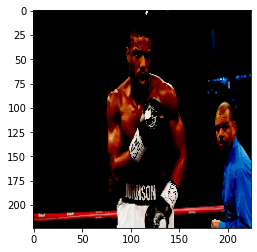

In [ ]:
plt.imshow(X_test[1])

# Actual test image

Show original mask for test image

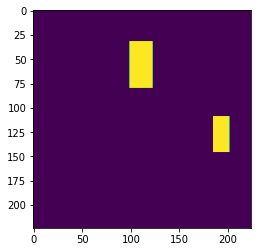

In [ ]:
plt.imshow(y_test[1])

# Provided mask label of the test image

Predict the mask on the test image

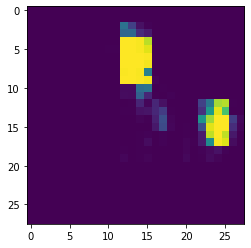

In [ ]:
results = model.predict(X_test)

plt.imshow(results[1])

# Predicted mask on the test image

### Impose the mask on the test image (3 marks)
- In imshow use the alpha parameter and set it to greater than 0.5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


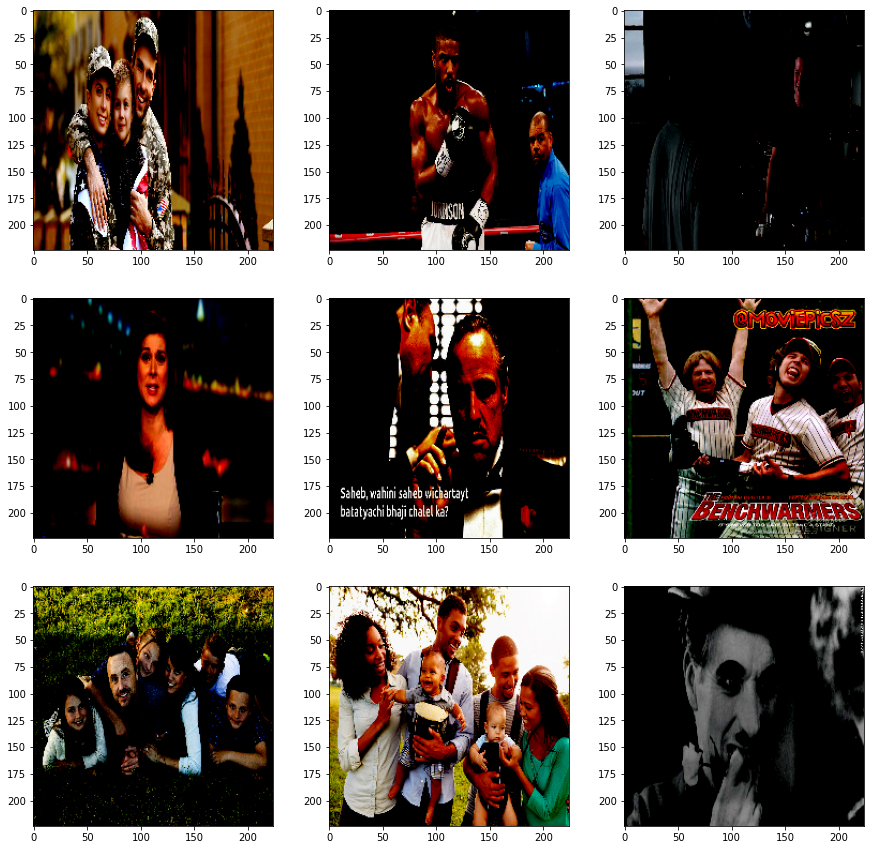

In [ ]:
plt.figure(figsize=(15,15))

for i in range(1,10):

  plt.subplot(3,3,i)

  unscaled_image = X_test[i-1]

  plt.imshow(unscaled_image)

  # Below are the test images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


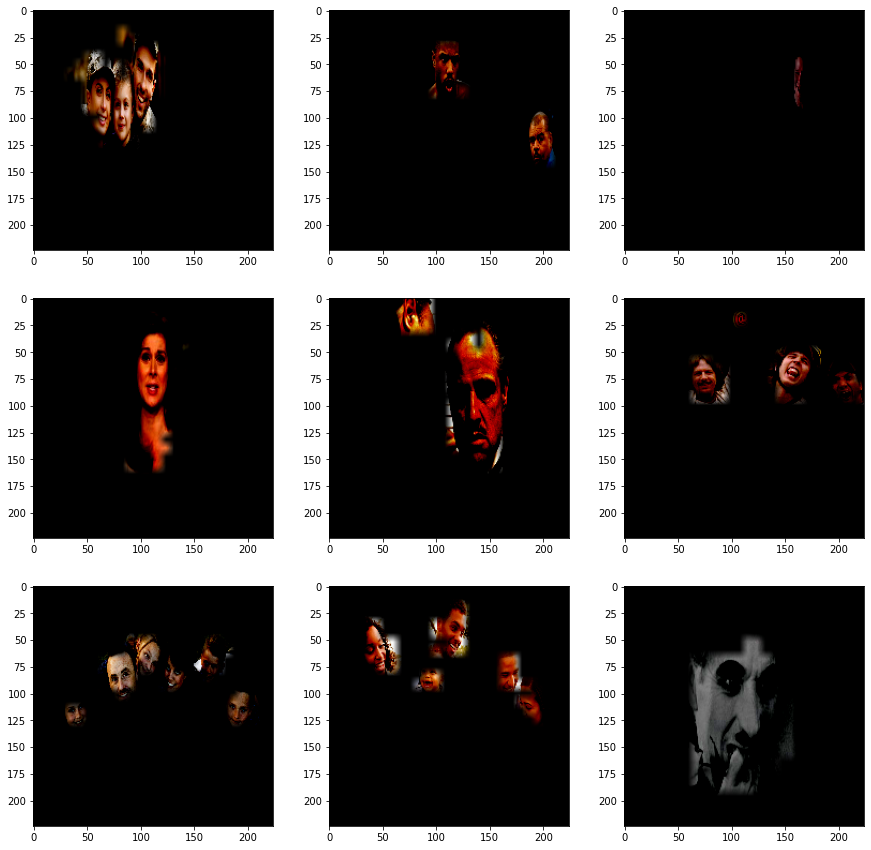

In [ ]:
plt.figure(figsize=(15,15))

for i in range(1,10):

  plt.subplot(3,3,i)

  unscaled = X_test[i-1]

  image = cv2.resize(unscaled, (IMAGE_WIDTH, IMAGE_HEIGHT))

  pred_mask = cv2.resize(1.0*(model.predict(np.array([image]))[0] > 0.5), (IMAGE_WIDTH,IMAGE_HEIGHT))

  image2 = image
  image2[:,:,0] = pred_mask*image[:,:,0]
  image2[:,:,1] = pred_mask*image[:,:,1]
  image2[:,:,2] = pred_mask*image[:,:,2]

  out_image = image2

  plt.imshow(out_image)
  
# Below are the MASKED test images!!